In [1]:
import anuga
import numpy


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
dam_wall_poly = numpy.loadtxt('dam_wall.csv', delimiter=',')
riverwalls = {'dam_wall' : dam_wall_poly}

boundary_poly = numpy.loadtxt('boundary_poly.csv', delimiter=',')
boundary_tags={'Dam':  [i for i in range(754,760)]}

max_tri_area = 40000
mesh_filename = 'warragamba_from_regions_%s.tsh'% str(max_tri_area)
domain = anuga.create_domain_from_regions(boundary_poly, 
                                           boundary_tags,
                                           maximum_triangle_area = max_tri_area,
                                           breaklines = riverwalls.values(),
                                           mesh_filename = mesh_filename)

domain.print_statistics()

------------------------------------------------
Mesh statistics:
  Number of triangles = 7869
  Extent [m]:
    x in [0.00000e+00, 3.30171e+04]
    y in [0.00000e+00, 4.46729e+04]
  Areas [m^2]:
    A in [1.92393e+02, 3.99346e+04]
    number of distinct areas: 7869
    Histogram:
      [1.92393e+02, 4.16661e+03[: 1755
      [4.16661e+03, 8.14083e+03[: 1770
      [8.14083e+03, 1.21151e+04[: 958
      [1.21151e+04, 1.60893e+04[: 647
      [1.60893e+04, 2.00635e+04[: 722
      [2.00635e+04, 2.40377e+04[: 711
      [2.40377e+04, 2.80119e+04[: 587
      [2.80119e+04, 3.19861e+04[: 366
      [3.19861e+04, 3.59604e+04[: 232
      [3.59604e+04, 3.99346e+04]: 121
    Percentiles (10 percent):
      786 triangles in [1.92393e+02, 2.60034e+03]
      786 triangles in [2.60034e+03, 3.89848e+03]
      786 triangles in [3.89848e+03, 5.19297e+03]
      786 triangles in [5.19297e+03, 7.00469e+03]
      786 triangles in [7.00469e+03, 9.55652e+03]
      786 triangles in [9.55652e+03, 1.34846e+04]
      

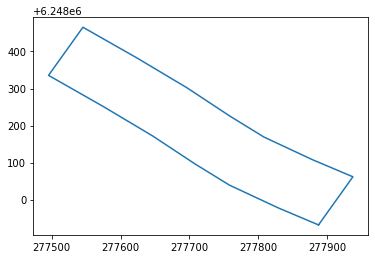

In [3]:
below_dam_poly = [ [point[0], point[1]] for point in dam_wall_poly] + [boundary_poly[i] for i in range(760,752, -1)]

ids = domain.get_triangles_inside_polygon(below_dam_poly)

below_dam_poly = numpy.array(below_dam_poly)
#print(ids)

#print('below_dam_poly', below_dam_poly[:,0])
#print('below_dam_poly', below_dam_poly[:,1])
plt.plot(below_dam_poly[:,0], below_dam_poly[:,1])

Figure files for each frame will be stored in _plot


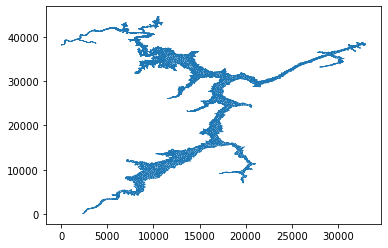

In [4]:
dplotter = anuga.Domain_plotter(domain) 

plt.figure(1)
plt.clf()
plt.triplot(dplotter.triang, linewidth = 0.4);


plt.show()

NameError: name 'iarea' is not defined

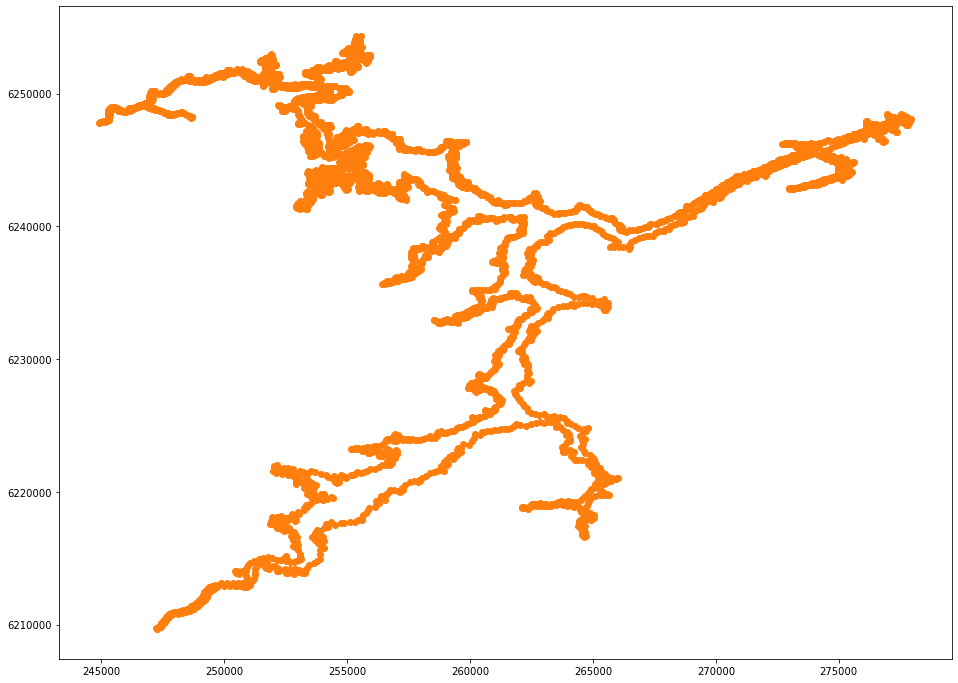

In [6]:
plt.figure(figsize=(16,12))
plt.clf()

xll_corner = domain.geo_reference.xllcorner
yll_corner = domain.geo_reference.yllcorner

centroid_c = domain.centroid_coordinates

# First concentration point
"""
xlim_0 = 259100
xlim_1 = 259300
ylim_0 = 6246100
ylim_1 = 6246300
"""

# Full region
#xlim_0 = 277000
#xlim_1 = 278000
#ylim_0 = 6247000
#ylim_1 = 6246300

# Dam
"""
xlim_0 = 277400
xlim_1 = 278000
ylim_0 = 6247500
ylim_1 = 6249000
"""

# Second
#xlim_0 = 255100
#xlim_1 = 255300
#ylim_0 = 6247000
#ylim_1 = 6247500

# Dam
xlim_0 = 276750
xlim_1 = 277000
ylim_0 = 6240000
ylim_1 = 6250000



plt.plot(boundary_poly[:,0], boundary_poly[:,1])
plt.plot(boundary_poly[:,0], boundary_poly[:,1], 'o')

plt.plot(centroid_c[iarea[0:2],0]+xll_corner, centroid_c[iarea[0:2],1]+yll_corner, 'bo')
#plt.scatter(gx,gy, s=8, c='red')
#for i, (x,y) in enumerate(zip(boundary_poly[:,0],boundary_poly[:,1])):
#    if (x > xlim_0 and x < xlim_1) and (y > ylim_0 and y < ylim_1):
#        plt.annotate(str(i), (x,y))

#plt.xlim(xlim_0, xlim_1)
#plt.ylim(ylim_0, ylim_1)
plt.show()

In [88]:
boundary_poly = numpy.delete(boundary_poly,768,0)

In [89]:
numpy.savetxt('boundary_poly.csv', boundary_poly, delimiter=',')

Try to plot 30M points


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
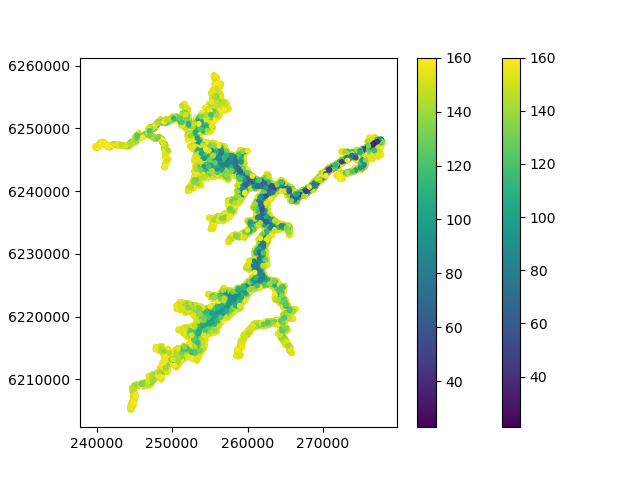

Max eastings  277920.47711870144
Min eastings  239756.47724852548
Max northings  6258545.428332543
Min northings  6205098.643121111
Making elev_fun (This can take some time)
set_quantity


In [61]:
x = numpy.load('data/elevation/x.npy')
y = numpy.load('data/elevation/y.npy')
elev = numpy.load('data/elevation/elev.npy')


# Add in some points downstream of dam
xd = boundary_poly[754:761,0]
yd = boundary_poly[754:761,1]
ed = numpy.ones_like(xd)*40

xdd = xd - 50.0
ydd = yd - 130.0
edd = numpy.ones_like(xd)*40

x = numpy.append(x,xd)
y = numpy.append(y,yd)
elev = numpy.append(elev,ed)

x = numpy.append(x,xdd)
y = numpy.append(y,ydd)
elev = numpy.append(elev,edd)


x = x.reshape((-1,1))
y = y.reshape((-1,1))
elev = elev.reshape((-1,1))

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Try to plot 30M points')


plt.figure(3)
plt.clf()
index = numpy.random.choice(x.shape[0], 100000, replace=False)
X = x[index]
Y = y[index]
Z = elev[index]
plt.scatter(X,Y, c=Z, marker='.')
plt.colorbar()
plt.show()

xyvalues = numpy.hstack((x,y,elev))

#data_points = numpy.hstack((x,y))
#georef = anuga.Geo_reference(zone=-1)
#geo_data = anuga.Geospatial_data(geo_reference=georef, data_points=data_points)

#print(geo_data)
#print(geo_data.geo_reference)

print('Max eastings ', numpy.max(x))
print('Min eastings ', numpy.min(x))
print('Max northings ', numpy.max(y))
print('Min northings ', numpy.min(y))

from anuga.utilities.quantity_setting_functions import make_nearestNeighbour_quantity_function

print('Making elev_fun (This can take some time)')
elev_fun = make_nearestNeighbour_quantity_function(xyvalues, domain, method='min', k_nearest_neighbours=10)


print('set_quantity')
#domain.set_quantity('elevation', function=elev_fun, location='centroids')
Elev = domain.quantities['elevation']
Elev.set_values(function=elev_fun, location='centroids')

ids =[7441, 7452, 7453, 7455, 7456, 7446, 7451, 7449, 7450, 7424, 7433]
Elev.set_values(40.0, indices=ids)





In [62]:
xll_corner = domain.geo_reference.xllcorner
yll_corner = domain.geo_reference.yllcorner

centroid_coordinates = domain.centroid_coordinates

print(centroid_coordinates.shape)

ids = numpy.argwhere((centroid_coordinates[:,0]>277500.0-xll_corner)*(centroid_coordinates[:,1]>6248000.0-yll_corner))

ids

(7962, 2)


array([[2163],
       [3931],
       [3972],
       [7424],
       [7429],
       [7433],
       [7441],
       [7442],
       [7446],
       [7449],
       [7450],
       [7451],
       [7452],
       [7453],
       [7455],
       [7456],
       [7459],
       [7460]])

In [63]:
Elev_c = domain.quantities['elevation'].centroid_values
Stage_c = domain.quantities['stage'].centroid_values

In [64]:
Elev_c[ids]

array([[ 77.],
       [ 62.],
       [ 45.],
       [ 40.],
       [111.],
       [ 40.],
       [ 40.],
       [115.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 57.],
       [ 20.]])

In [65]:
Stage = domain.quantities['stage']
Stage.set_values(116.0, location='centroids')
Stage.maximum(Elev)

Stage_c[ids]

array([[116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.],
       [116.]])

(18, 1)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
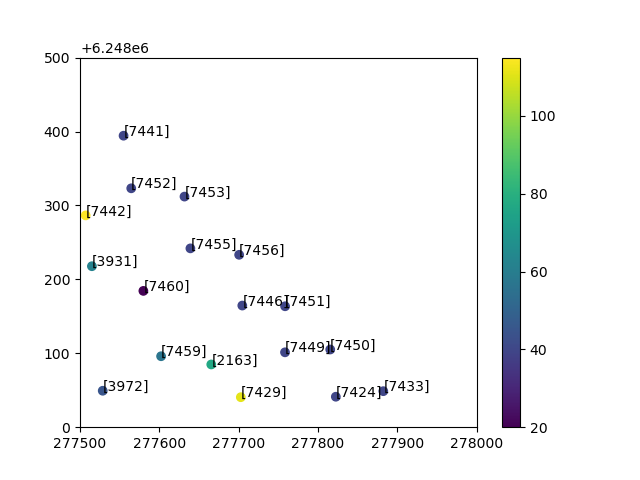

In [67]:
plt.figure(4)
plt.clf()

bp0 = centroid_coordinates[ids,0] + xll_corner
bp1 = centroid_coordinates[ids,1] + yll_corner

print(bp0.shape)
plt.scatter(bp0, bp1, c=Elev_c[ids])

for i, (x,y) in enumerate(zip(bp0,bp1)):
    plt.annotate(str(ids[i]), (x,y))

plt.colorbar()
plt.xlim(277500,278000)
plt.ylim(6248000,6248500)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
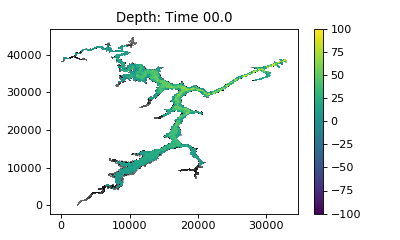

(37340.86174477823, 38840.86174477823)

In [23]:
ids = [7441, 7452, 7453, 7455, 7456, 7446, 7451, 7449, 7450, 7424, 7433]


plt.figure(5)
dplotter.plot_depth_frame(vmin=-100, vmax= 100)
plt.xlim(277000-xll_corner,278000-xll_corner)
plt.ylim(6247000-yll_corner,6248500-yll_corner)